## 1. Espacio de Probabilidad


# ----------------------------------------
## 1.1  Probabilidad Laplaciana (clásica)
# ---------------------------------------



### 1.1.1 Espacio Muestral
El espacio muestral, también llamado espacio muestra,
de un experimento aleatorio es el conjunto de todos los posibles resultados del experimento y se le denota, generalmente, por la letra griega
 $\Omega$. (Rincón,2014).
 
Teniendo esto en cuenta:

Sea $A$ un evento, entonces

$$ \mathbb{P}(A) = \frac{\#A}{\#\Omega} $$

**EJEMPLO:** Sea el experimento de lanzar una moneda 3 veces, de manera independiente (es decir, el $i$-ésimo lanzamiento no me afecta al $i+1$ lanzamiento). El espacio muestral de este experimento es:

$$ \Omega = \{A,S\} \times \{A,S\} \times \{A,S\} = \{A,S\}^3 $$
y tenemos que $\#\Omega = 2^3$.

Sean los eventos:
* $A$: todos los resultados son águila
* $S$: todos los resultados son soles
* $E$: Por lo menos un resultado es sol
  
Calcular las probabilidades de estos eventos:

**Solución** Vamos a descomponer mi conjunto $A$ de la siguiente manera:
$$A = A_1 \cap A_2 \cap A_3 $$
donde $A_i$: caé águila en el $i$-ésimo resultado.

In [49]:
# Vamos a crear el espacio muestral
import itertools #importamos el modulo
from itertools import product

Omega = set( product({"A","S"},repeat=3 ))
Omega

{('A', 'A', 'A'),
 ('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [51]:
len(Omega) # cardinalidad de Omega

8

In [53]:
# Vamos a crear el evento A_1
A_1 = { om for om in Omega if om[0]=="A"} # la primera coordenada es águila
A_1

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [55]:
# Vamos a crear el evento A_2
A_2 = { om for om in Omega if om[1]=="A"} # la segunda coordenada es águila
A_2

{('A', 'A', 'A'), ('A', 'A', 'S'), ('S', 'A', 'A'), ('S', 'A', 'S')}

In [57]:
# Vamos a crear el evento A_3
A_3 = { om for om in Omega if om[2]=="A"} # la tercera coordenada es águila
A_3

{('A', 'A', 'A'), ('A', 'S', 'A'), ('S', 'A', 'A'), ('S', 'S', 'A')}

In [59]:
# Vamos a crear el evento A 
A = A_1.intersection(A_2.intersection(A_3))
A

{('A', 'A', 'A')}

In [61]:
len(A)

1

In [63]:
# Vamos a calcular la probabilidad de A
P_A = len(A) / len(Omega)
P_A

0.125

Yo quiero expresar mi resultado en fracción, esto se hace de la siguiente manera:

In [66]:
from fractions import Fraction

def p(E,Omega):
    p = Fraction(len(E),len(Omega))
    return p

In [68]:
prob = p(A,Omega)
prob

Fraction(1, 8)

### Ejemplo 2

Considere el problema de seleccionar dos solicitantes para un trabajo, de un grupo de cinco 
solicitantes e imagine que éstos varían en grado de competencia, 1 siendo el mejor, 2 el segundo mejor y así sucesivamente para 3, 4 y 5. Estas clasificaciones son por supuesto desconocidas para el empleador. Definamos dos eventos A y B como:
A: El empleador selecciona al mejor y a uno de los dos solicitantes menos aptos (1 y 4 o 
1 y 5).
B: El empleador selecciona al menos uno de los dos mejores.
Encuentre las probabilidades de estos eventos. (Mendenhall,2009)

### Solución

In [74]:
from itertools import combinations

# Lista de solicitantes por su competencia (1 = mejor, 5 = peor)
solicitantes = [1, 2, 3, 4, 5]

# Generar todas las combinaciones posibles de 2 solicitantes
todas_las_combinaciones = list(combinations(solicitantes, 2))

total_combinaciones = len(todas_las_combinaciones)
casos_A = 0
casos_B = 0

for combo in todas_las_combinaciones:
    s1, s2 = combo
    seleccion = set(combo)

    # Evento A: se selecciona al mejor (1) y a uno de los dos menos aptos (4 o 5)
    if 1 in seleccion and (4 in seleccion or 5 in seleccion):
        casos_A += 1

    # Evento B: se selecciona al menos uno de los dos mejores (1 o 2)
    if 1 in seleccion or 2 in seleccion:
        casos_B += 1

# Calcular probabilidades
prob_A = casos_A / total_combinaciones
prob_B = casos_B / total_combinaciones

print(f"Total de combinaciones posibles: {total_combinaciones}")
print(f"Casos favorables a A: {casos_A}")
print(f"Probabilidad de A: {prob_A:.4f}")
print(f"Casos favorables a B: {casos_B}")
print(f"Probabilidad de B: {prob_B:.4f}")


Total de combinaciones posibles: 10
Casos favorables a A: 2
Probabilidad de A: 0.2000
Casos favorables a B: 7
Probabilidad de B: 0.7000


## 1.1.2 Eventos

En teoría de la probabilidad, llamaremos evento o suceso a cualquier subconjunto del espacio muestral. 

Ejemplo:

Si un experimento aleatorio consiste en lanzar un dado y observar el número que aparece en la cara superior, entonces claramente
el espacio muestral es el conjunto $\Omega$ $[ 1, 2, 3, 4, 5, 6]$. Como ejemplo de un evento para este experimento podemos definir el conjunto $A= [2, 4, 6]$ que corresponde al suceso de obtener como resultado un número par. Si al lanzar el dado una vez se obtiene el número $4$, decimos entonces que se
observó la ocurrencia del evento $A$. [Mendenhall,


## 1.1.3 Conjuntos





Pueden obtenerse nuevos conjuntos a partir de una colección inicial de eventos además se pueden llevar a cabo algunas operaciones sobre ellos. Consideraremos que estos nuevos conjuntos resultantes son también eventos y deseamos poder calcular su probabilidad.
Supondremos que el espacio muestral $\Omega$ de un experimento aleatorio es una especie de conjunto universal. Al conjunto vacío lo denotaremos, como es usual, por el símbolo $\varnothing$. Otros símbolos usuales son los de pertenencia ($\in$) o no pertenencia ($\notin$) de un elemento en un conjunto, y los de contención ($\subseteq$, $\supseteq$) o no contención ($\nsubseteq$) de un conjunto en otro.

Se dice que $A$ es un subconjunto propio de $B$ si $A \subset B$, es decir, si $A$ está contenido en $B$ pero no es todo $B$. La igualdad de dos conjuntos $A$ y $B$ significa que se cumplen las dos contenciones: $A \subseteq B$ y $B \subseteq A$. Por último, si $A$ es un conjunto, denotamos la cardinalidad o número de elementos de ese conjunto por el símbolo $\#A$.

Ahora procederemos a definir algunas operaciones entre conjuntos:Recordamos a continuación
las operaciones básicas de unión, intersección, diferencia y complemento. (Mendenhall,2007)
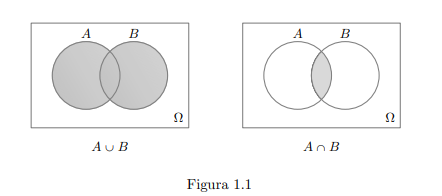

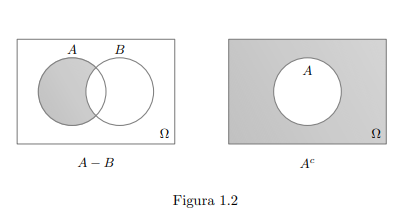

### Ejemplo



Suponga que una familia contiene dos hijos de edades diferentes y estamos interesados en el género de estos niños. Denotemos con $ F $ que una hija es mujer y \( M \) que el hijo es hombre y denote con un par, por ejemplo \( F M \), que el hijo de mayor edad es la niña y el más joven es el niño. 

Hay cuatro puntos en el conjunto $S $ de posibles observaciones:
$
S = \{ FF, FM, MF, MM \}.
$

Denote con $ A $ el subconjunto de posibilidades que no contenga hombres; $B $, el subconjunto que contiene dos hombres; y $ C $, el subconjunto que contenga al menos un hombre.


  $A = \{ FF \} $
$B = \{ MM \} $
  $C = \{ FM, MF, MM \} $


Operaciones entre conjuntos:

\begin{align*}
A \cap B &= \varnothing \\
A \cup B &= \{ FF, MM \} \\
A \cap C &= \varnothing \\
A \cup C &= \{ FF, FM, MF, MM \} = S \\
B \cap C &= \{ MM \} \\
B \cup C &= \{ FM, MF, MM \}
\end{align*}



### Solución

In [83]:
# Definimos el conjunto de posibles observaciones
S = {"FF", "FM", "MF", "MM"}

# A: subconjunto que no contiene hombres => solo FF
A = {"FF"}

# B: subconjunto que contiene dos hombres => solo MM
B = {"MM"}

# C: subconjunto que contiene al menos un hombre => FM, MF, MM
C = {"FM", "MF", "MM"}

# Operaciones de conjuntos
A_inter_B = A & B
A_union_B = A | B
A_inter_C = A & C
A_union_C = A | C
B_inter_C = B & C
B_union_C = B | C

# Mostrar los resultados
print("A =", A)
print("B =", B)
print("C =", C)
print("A ∩ B =", A_inter_B)
print("A ∪ B =", A_union_B)
print("A ∩ C =", A_inter_C)
print("A ∪ C =", A_union_C)
print("B ∩ C =", B_inter_C)
print("B ∪ C =", B_union_C)


A = {'FF'}
B = {'MM'}
C = {'MF', 'FM', 'MM'}
A ∩ B = set()
A ∪ B = {'MM', 'FF'}
A ∩ C = set()
A ∪ C = {'MF', 'FM', 'MM', 'FF'}
B ∩ C = {'MM'}
B ∪ C = {'MF', 'FM', 'MM'}


##  1.1.4 Probabilidad condicional

Definimos la probabilidad de que ocurra un evento $A$ sabiendo que ocurre el evento $B$, 
$$ \mathbb{P}(A \mid B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)} = \frac{\# A\cap B}{\#B} $$
donde $\mathbb{P}(B)>0$. 

## Ejemplos



Suponga que un dado balanceado se lanza una vez. 
Definamos los siguientes eventos:

$A$: observar un 1.

    
$B$: observar un número impar.


Buscamos la probabilidad de $A$ dado que el evento $B$ ha ocurrido, es decir, $P(A \mid B)$.

El evento $A \cap B$ representa observar un 1 que también es impar. En este caso, $A \subset B$, por lo que:

$
A \cap B = A, \quad \text{y por lo tanto} \quad P(A \cap B) = P(A) = \frac{1}{6}.
$

También sabemos que hay tres números impares en un dado (1, 3, 5), así que:

$
P(B) = \frac{3}{6} = \frac{1}{2}.
$

Aplicando la definición de probabilidad condicional:

$
P(A \mid B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{1}{6}}{\frac{1}{2}} = \frac{1}{3}.
$


In [15]:
def prob_cond(E,F):
    return len(E & F) / len(F)

Quiero calcular la probabilidad condicional de los siguientes eventos:
* El primer lanzamiento es águila
* Dos de los resultados son águila 

In [17]:
# El primer lanzamiento es águila
B = { om for om in Omega if om[0]=="A"} # el primer lanzamiento es águila
B

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [18]:
C = { om for om in Omega if om.count("A")==2}
C

{('A', 'A', 'S'), ('A', 'S', 'A'), ('S', 'A', 'A')}

In [19]:
def prob(E): 
    return len(E) / len(Omega)

In [20]:
prob(B)

0.5

In [21]:
prob(C)

0.375

In [22]:
prob_cond(B,C)

0.6666666666666666

### Ejemplo

Una población de electores contiene 40% de republicanos y 60% de demócratas. Se publica que 30% de 
los republicanos y 70% de los demócratas están a favor de un tema de elección. Se encuentra que una 
persona seleccionada al azar de esta población está a favor del tema en cuestión. Encuentre la probabilidad condicional de que esta persona sea un demócrata. (Mendenhall, 2009)

### Solución

In [94]:
def probabilidad_total(p_f_d, p_d, p_f_r, p_r):
    """Calcula la probabilidad total de estar a favor del tema (P(F))"""
    return p_f_d * p_d + p_f_r * p_r

def probabilidad_condicional(p_f_d, p_d, p_f_total):
    """Aplica el Teorema de Bayes para calcular P(D|F)"""
    return (p_f_d * p_d) / p_f_total

# Datos del problema
p_r = 0.4      # P(R)
p_d = 0.6      # P(D)
p_f_r = 0.3    # P(F|R)
p_f_d = 0.7    # P(F|D)

# Cálculos
p_f_total = probabilidad_total(p_f_d, p_d, p_f_r, p_r)
p_d_given_f = probabilidad_condicional(p_f_d, p_d, p_f_total)

# Resultado
print(f"La probabilidad de que sea demócrata dado que está a favor es: {p_d_given_f:.4f}")


La probabilidad de que sea demócrata dado que está a favor es: 0.7778


## 1.1.4 Independencia de eventos

Decimos que dos eventos $A$ y $B$ son independientes si
$$ \mathbb{P}(A\cap B) = \mathbb{P}(A)\mathbb{P}(B)$$
o de manera equivalente
$$ \mathbb{P}(A | B ) = \mathbb{P}(A) $$

In [24]:
def indep(E,F):
    return prob(E & F) == prob(E)*prob(F)

In [25]:
indep(B,C)

False

Vamos a considerar el evento:
* $D$: en el segundo lanzamiento es sol

In [27]:
D = { om for om in Omega if om[1]=="S"}
D

{('A', 'S', 'A'), ('A', 'S', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')}

In [28]:
prob(D)

0.5

In [29]:
prob_cond(B,D)

0.5

In [30]:
indep(B,D)

True

Quiero verificar si $B$, $C$ y $D$ son independientes:

In [32]:
indep(B,D)

True

In [33]:
indep(C,D)

False

In [34]:
indep(B,C)

False

Por lo tanto, los eventos no son independientes. 

**EJEMPLO** Sea el experimento aleatorio de lanzar un dado dos veces. Sabemos que el espacio muestral es el siguiente:
$$ \Omega = \{ (i,j) | i,j \in \{1,2,3,4,5,6 \} \} = \{1,2,3,4,5,6 \} \times \{1,2,3,4,5,6 \} = \{1,2,3,4,5,6 \}^2$$ 
y además $\#\Omega = 6^2 = 36$

In [81]:
Omega_dado =  set( product([1,2,3,4,5,6],repeat=2 )) 
Omega_dado

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [83]:
cardOm = len(Omega_dado)
cardOm

36

Definimos el evento:
* $S_n$: la suma de los dados en $n$
y escrito como conjunto es
$$ S_n = \{ (i,j)\in\Omega \mid i+j = n \}$$

In [85]:
def S(n): 
    Sn = { (i,j) for i in range(1,7) for j in range(1,7) if i+j == n }
    return Sn

In [91]:
S_nueve = S(9)
S_nueve


In [95]:
len(S_nueve) / cardOm

0.1111111111111111

$$ \mathbb{P}(S(9)) = 4/36 $$

### Ejemplo 2


Tres marcas de café, X, Y y Z, van a ser clasificadas por un juez de acuerdo con su sabor. Defina los siguientes eventos:


- A: La marca X es preferida a la Y.
 
- B: La marca X es clasificada como la mejor.
 
-  C: La marca X es clasificada como la segunda mejor.
 
- D: La marca X es clasificada como la tercera mejor.

Si el juez no tiene preferencia por el sabor y asigna el lugar a las marcas al azar, ¿el evento A es independiente de los eventos B, C y D?



### Solución


Los seis puntos muestrales igualmente probables para este experimento están dados por las siguientes permutaciones de las marcas:

$
E_1 : XYZ, \quad E_2 : XZY, \quad E_3 : YXZ, \quad E_4 : YZX, \quad E_5 : ZXY, \quad E_6 : ZYX
$

donde $ X, Y, Z $ denotan que X es clasificada como la mejor, $Y$ es la segunda mejor y $Z$ la última. Entonces, los eventos son los siguientes:

$
A = \{ E_1, E_2, E_5 \}, \quad B = \{ E_1, E_2 \}, \quad C = \{ E_3, E_5 \}, \quad D = \{ E_4, E_6 \}
$

Calculamos las probabilidades de cada evento:

$
P(A) = \frac{3}{6} = \frac{1}{2}, \quad P(B) = \frac{2}{6} = \frac{1}{3}, \quad P(C) = \frac{2}{6} = \frac{1}{3}, \quad P(D) = \frac{2}{6} = \frac{1}{3}
$

Ahora, calculamos las probabilidades de las intersecciones de los eventos:

$
P(A \cap B) = \frac{2}{6} = \frac{1}{3}, \quad P(A \cap C) = \frac{1}{6}, \quad P(A \cap D) = 0
$

Finalmente, verificamos la independencia de los eventos:

- A y B
Queremos verificar si $ P(A \cap B) = P(A) \cdot P(B) $:

$
P(A \cap B) = \frac{1}{3}, \quad P(A) \cdot P(B) = \frac{1}{2} \cdot \frac{1}{3} = \frac{1}{6}
$

Como $ P(A \cap B) \neq P(A) \cdot P(B) $, los eventos A y B son dependientes.

- A y C
Queremos verificar si $ P(A \cap C) = P(A) \cdot P(C) $:

$
P(A \cap C) = \frac{1}{6}, \quad P(A) \cdot P(C) = \frac{1}{2} \cdot \frac{1}{3} = \frac{1}{6}
$

Como $ P(A \cap C) = P(A) \cdot P(C) $, los eventos A y C son independientes.

- A y D
Queremos verificar si $ P(A \cap D) = P(A) \cdot P(D) $:

$
P(A \cap D) = 0, \quad P(A) \cdot P(D) = \frac{1}{2} \cdot \frac{1}{3} = \frac{1}{6}
$

Como $ P(A \cap D) \neq P(A) \cdot P(D) $, los eventos A y D son dependientes.

### Conclusión 

- Los eventos A y B son dependientes.
- Los eventos A y C son independientes.
- Los eventos A y D son dependientes.





# -------------------------------
## 1.2 Probabilidad Geométrica
# -------------------------------

Esta es una extensión de la definición de probabilidad clásica, en donde ahora la probabilidad de un evento se calcula ya no a través de su cardinalidad,
sino mediante la determinación de su área, volumén o alguna característica geométrica equivalente, según el problema que se trate. Para el caso de áreas
la definición es la siguiente.


Si un experimento aleatorio tiene como espacio muestral $\Omega \subset \mathbb{R}^2$, cuya área está bien definida y es finita, entonces se define la probabilidad geométrica de un evento $A \subseteq \Omega$ como
$
P(A) = \frac{\text{Área de } A}{\text{Área de } \Omega},
$
cuando el concepto de área del subconjunto $A$ está bien definido. (Rincón,2014)

Para poder aplicar la fórmula anterior, es necesario suponer que el espacio muestral es equiprobable en el sentido de que la probabilidad de observar la
ocurrencia de un evento A depende únicamente de su área y no del conjunto mismo. Esta definición puede enunciarse también para el caso cuando $\Omega$ es un subconjunto de $R$, y en tal caso se habla de longitud, o bien cuando $\Omega$ es un subconjunto de $R3$ se habla de volumen, etcétera. 




## El problema del encuentro 

Romeo y Julieta pretenden encontrarse en un lugar específico entree $[0,60]$.

- Si Romeo llega primero, entonces piensa esperar 10 minutos
- Si Julieta llega primero, entonces piensa esperar 10 minutos

Se elige un número al azar entre $0$ y $60$, y supongamos que el par de números se eñige sobre el cuadrado $60^2$, de modo que la probabilidad de un evento, sea el área favorable entre el área total.

Sea el evento 
- $A$: Romeo y Julieta se encuentran a una distancia de $10$ minutos. 

La probabilidad del evento A es: 0.305662.


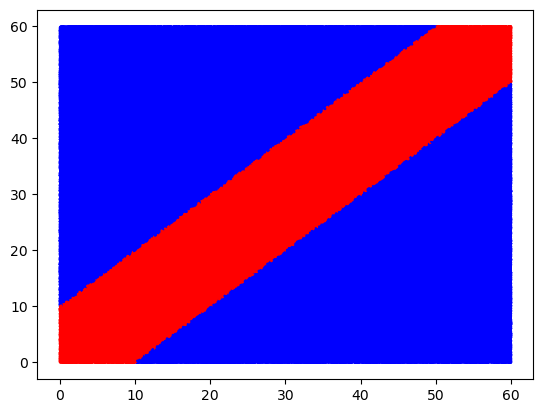

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Vamos a generar 100,000 simulaciones
muestra = 1000000

# Generamos los tiempos aleatorios entre [0,60]
# x : tiempo de llegada de Romero [0,60]
# y : tiempo de llegada de Romero [0,60]

x,y = np.random.uniform(0,60,muestra), np.random.uniform(0,60,muestra)

# Vamos a añadir nuestra condición de encuentro 
encuentro = np.where(abs(x-y)<=10, 'r', 'b') # r si se encuentran y b si no se encuentran

# Calculo de la probabilidad del encuentro
k=0
for elemento in encuentro:
    if elemento == 'r':
        k += 1

print("La probabilidad del evento A es: {}.".format(k/muestra))

plt.scatter(x,y,c=encuentro,s=1)
plt.show()

 ### El problema del juego de una feria)
El juego de una feria consiste en lanzar monedas de radio r sobre un tablero cuadriculado
como el que se muestra a continuación:
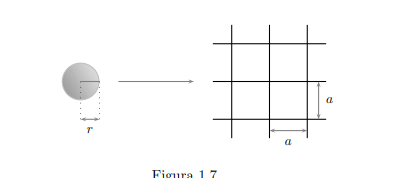





En donde el lado de cada cuadrado
mide a unidades. Un jugador se hace acreedor a un premio si la moneda
lanzada no toca ninguna de las líneas. ¿De qué tamaño deben ser $a$ y $r$ para
que la probabilidad de ganar en este juego sea menor a $\frac{1}{4}$?

### Solución 

Primero debemos observar que es suficiente considerar lo que sucede únicamente en el cuadrado donde cae el centro de la moneda.

No es difícil darse cuenta que la moneda no toca ninguna línea si su centro cae dentro del cuadrado interior que se muestra en la Figura 

Por lo tanto, si $ A $ denota el evento de ganar con un lanzamiento en este juego, entonces la probabilidad de $ A $ es el cociente entre el área favorable y el área total:

$
P(A) = \frac{(a - 2r)^2}{a^2} = \left(1 - \frac{2r}{a}\right)^2
$

Donde:


$ a $: longitud del lado del cuadrado
 $ r $: radio de la moneda


Si deseamos que esta probabilidad sea menor que $ \frac{1}{4} $, entonces:

$
\left(1 - \frac{2r}{a}\right)^2 < \frac{1}{4}
$

Desarrollando esta desigualdad:

$
1 - \frac{2r}{a} < \frac{1}{2}
\quad \Rightarrow \quad
\frac{2r}{a} > \frac{1}{2}
\quad \Rightarrow \quad
a < 4r
$



Por lo tanto, para que la probabilidad de ganar sea menor que $ \frac{1}{4} $, se debe cumplir la condición:

$
a < 4r
$


Cuando $a = 4r $, la probabilidad de ganar es exactamente:

$
\left(1 - \frac{2r}{a} \right)^2 = \left(1 - \frac{1}{2} \right)^2 = \left( \frac{1}{2} \right)^2 = \frac{1}{4}
$

### Conclusión

La condición para que la probabilidad de ganar en este juego sea menor que $ \frac{1}{4}$ es:

$
\boxed{a < 4r}
$



# ----------------------------------
## 1.3 Probabilidad Frecuentista
# ----------------------------------




Suponga que se realizan $n$ repeticiones de un cierto experimento aleatorio y que se registra el número de veces que ocurre un determinado evento $A$. Esta información puede ser usada de la siguiente forma para definir la probabilidad de $A$.

Sea $n_A$ el número de ocurrencias del evento $A$ en $n$ realizaciones del experimento aleatorio. La probabilidad frecuentista del evento $A$ se define como el límite:

$
P(A) = \lim_{n \to \infty} \frac{n_A}{n}
$

(Rincón,2014)

Otra definición que se tiene es partiendo de la hipótesis de que el espacio muestral es un conjunto finito, y podemos definir la probabilidad asociada a un evento $A$:

$$ f_n(A) = \frac{n(A)}{n}, $$
donde $n(A)$ denota al número de veces que ocurre $A$, y $n$ es el número de veces en que se realiza el experimento.

## Ejemplo

In [56]:
import random 

Se tiene el lanzamiento de monedas injustas (volados)


In [59]:
def volado(p):
    return 'sol' if random.random() < p else 'aguila'

In [61]:
volado(0.4)

'aguila'

In [63]:
a = [volado(0.4) for i in range(10)]
a

['aguila',
 'aguila',
 'aguila',
 'aguila',
 'sol',
 'sol',
 'aguila',
 'aguila',
 'aguila',
 'sol']

In [65]:
a.count("sol")

3

In [69]:
resultados = [] # lista vacia

In [71]:
for i in range(10):
    resultado = volado(0.4)
    resultados.append(resultado)
resultados

['sol',
 'aguila',
 'aguila',
 'aguila',
 'sol',
 'sol',
 'aguila',
 'aguila',
 'aguila',
 'sol']

In [73]:
# Vamos a simular nuestra probabilidad frecuentista
p = [] #Lista para almacernar las probabilidades

for i in range(1000): #Simula 1000 experimentos
    N = 1000 # numero de lanzamientos 
    resultados = []

    for i in range(N):
        resultado = volado(0.63)
        resultados.append(resultado)

    n_soles = resultados.count("sol") # cuenta en número de soles
    p_soles = n_soles / N #calcula la proporción

    p.append(p_soles)

# Probabilidad promedio
p_soles_prom = sum(p) / 1000 

print("Probabiliad {:.3f}".format(p_soles_prom))   

Probabiliad 0.630


### Ejercicio 


Se tienen $2$ urnas, cada una de las cuales contiene $10$ bolas numeradas del $1$ al $10$.

Un experimento aleatorio consiste en seleccionar al azar una bola de cada urna.

Sea $X$ la variable aleatoria que representa la diferencia de los números de las dos bolas seleccionadas.

* Define $\Omega$
* Calcula las probabilidades asociadas
* Define la función de densidad
* Verifica que $\sum_{x\in R_X}f_X(x) = 1$
* Gráfica la función de densidad

Además, calcula la probabilidad de que los números de las dos bolas seleccionadas difieran por $2$ o más.

### Solución

Sea $$\Omega = \{ (x,y) | x,y \in \{ 1,2,3,4,5,6,7,8,9,10 \} \} $$

In [6]:
from itertools import product
import numpy as np
from fractions import Fraction
from collections import defaultdict
import pandas as pd

In [8]:
omega = set(product({1,2,3,4,5,6,7,8,9,10},repeat=2))

In [10]:
def p(a):
  p = Fraction(len(a),len(omega))
  return p

In [12]:
s = {(x,y) : x-y for x,y in omega}

In [14]:
ds = defaultdict(set)

In [16]:
for i,j in s.items():
  ds[j].add(i)

In [18]:
list(ds.items())

[(-5, {(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)}),
 (4, {(5, 1), (6, 2), (7, 3), (8, 4), (9, 5), (10, 6)}),
 (-1,
  {(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)}),
 (1,
  {(2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9)}),
 (0,
  {(1, 1),
   (2, 2),
   (3, 3),
   (4, 4),
   (5, 5),
   (6, 6),
   (7, 7),
   (8, 8),
   (9, 9),
   (10, 10)}),
 (6, {(7, 1), (8, 2), (9, 3), (10, 4)}),
 (-3, {(1, 4), (2, 5), (3, 6), (4, 7), (5, 8), (6, 9), (7, 10)}),
 (2, {(3, 1), (4, 2), (5, 3), (6, 4), (7, 5), (8, 6), (9, 7), (10, 8)}),
 (8, {(9, 1), (10, 2)}),
 (-2, {(1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10)}),
 (-7, {(1, 8), (2, 9), (3, 10)}),
 (-9, {(1, 10)}),
 (-4, {(1, 5), (2, 6), (3, 7), (4, 8), (5, 9), (6, 10)}),
 (5, {(6, 1), (7, 2), (8, 3), (9, 4), (10, 5)}),
 (3, {(4, 1), (5, 2), (6, 3), (7, 4), (8, 5), (9, 6), (10, 7)}),
 (9, {(10, 1)}),
 (-6, {(1, 7), (2, 8), (3, 9), (4, 10)}),
 (7, {(8, 1), (9, 2), (10, 3)}),
 (-8, {(1, 9

In [20]:
leys={i : p(a) for i,a in ds.items()}

In [22]:
leys

{-5: Fraction(1, 20),
 4: Fraction(3, 50),
 -1: Fraction(9, 100),
 1: Fraction(9, 100),
 0: Fraction(1, 10),
 6: Fraction(1, 25),
 -3: Fraction(7, 100),
 2: Fraction(2, 25),
 8: Fraction(1, 50),
 -2: Fraction(2, 25),
 -7: Fraction(3, 100),
 -9: Fraction(1, 100),
 -4: Fraction(3, 50),
 5: Fraction(1, 20),
 3: Fraction(7, 100),
 9: Fraction(1, 100),
 -6: Fraction(1, 25),
 7: Fraction(3, 100),
 -8: Fraction(1, 50)}

Recordemos que:

$$X : \Omega \to \mathbb{R} $$

$$ f_X(x) = \begin{cases} \mathbb{P}(X=x), \quad \text{si } x\in R_{X} \\ 0 \quad \text{e.o.c} \end{cases} $$

Para nuestro evento $$s_n = \{ (x,y) \in \Omega : x-y = n \} $$ se tiene la siguiente variable aleatoria:
$$s:\Omega \rightarrow \{ -9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 \}$$

In [26]:
ley_s = pd.Series(leys)

In [ ]:
ley_s.sort_index()

In [28]:
def leys(i):
  if i in range(-9,10):
    x = ley_s[i]
  else:
    x=0
  return x

In [30]:
#Lista de posibles valores
rango_s=[k for k in range(-9,10)]

#Proba de cada suma
p_k = [float(leys(k)) for k in rango_s]

In [32]:
len(rango_s), len(p_k)

(19, 19)

In [34]:
# Dataframe: rango_s y probas p_k
df = pd.DataFrame({'rango_s':rango_s,
                   'p_k':p_k},
                   index = [f"s({i})" for i in range(-9,10)])
df['p_k'] = df['p_k'].apply(lambda x: x)
df.columns = ['Rango', 'Densidad']
df

,Rango,Densidad
s(-9),-9,0.01
s(-8),-8,0.02
s(-7),-7,0.03
s(-6),-6,0.04
s(-5),-5,0.05
s(-4),-4,0.06
s(-3),-3,0.07
s(-2),-2,0.08
s(-1),-1,0.09
s(0),0,0.10


In [36]:
# Se cumple la condición que la suma de todas las probabilidades es 1
df['Densidad'].sum()

1.0

<Axes: xlabel='Rango'>

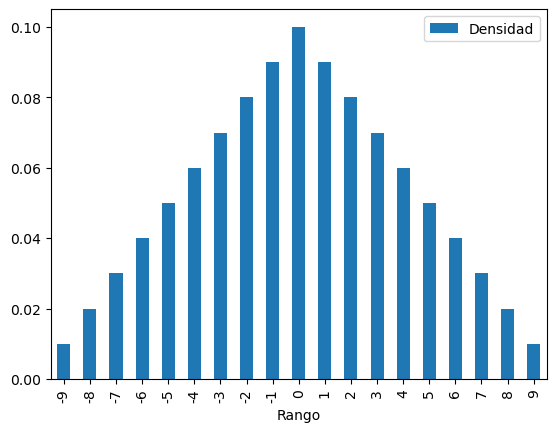

In [38]:
df.plot.bar(x='Rango', y='Densidad')

Calcula la probabilidad de que los números de las dos bolas seleccionadas difieran por  2  o más.

In [41]:
omega = set(product({1,2,3,4,5,6,7,8,9,10},repeat=2))

s = {(x,y) : abs(x-y) for x,y in omega} #Usamos valor absoluto para la diferencia

ds = defaultdict(set)
for i,j in s.items():
  ds[j].add(i)

leys={i : p(a) for i,a in ds.items()}

# Calcula la probabilidad de que los números difieran por 2 o más
prob_diferencia_2_o_mas = sum(leys[i] for i in leys if i >= 2)

print(f"La probabilidad de que los números difieran en 2 o más es: {prob_diferencia_2_o_mas}")


La probabilidad de que los números difieran en 2 o más es: 18/25
